# Algorand Covid-19 Project

## Exploratory Analysis
## Rahul Zalkikar | rz1567@nyu.edu

### Source documentation:
https://github.com/algorandfoundation/IReport-Covid/blob/master/js/retrieveData.js

In [23]:
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np

In [26]:
cleaner_data_df = pd.read_csv('cleaner_covidData.csv')
print(cleaner_data_df.shape)
cleaner_data_df.head(50)

(49800, 39)


,age_group,country_code,region_code,state_code,gender,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,when_discharged,still_in_hospital,when_admitted,received_care,symptom_quarantine,voluntary_quarantine,personally_required_quarantine,general_quarantine,when_quarantine_ended,still_in_quarantine,when_quarantine_started,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,when_symptoms_ended,still_symptomatic,when_symptoms_started,is_symptomatic,test_date,test_location,test_results,tried_to_get_tested,tested
0,30.0,US,PA,PA,m,190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
1,40.0,DE,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,NaN,1.0,2020-03-21,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
2,20.0,IT,72,72,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
3,55.0,IT,72,72,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,1.0,NaN,1.0,2020-03-16,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
4,20.0,GB,LAN,LAN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,2020-03-24,NaN,2020-03-15,-1.0,1.0,NaN,1.0,1.0,1.0,1.0,2020-03-24,NaN,2020-03-13,1.0,NaN,NaN,NaN,-1.0,-1.0
5,50.0,IT,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
6,50.0,IT,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,NaN,NaN,1.0,2020-03-10,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0
7,20.0,IT,72,72,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
8,20.0,IT,72,72,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,1.0,NaN,1.0,2020-03-04,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
9,40.0,IT,72,72,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,1.0,NaN,1.0,2020-03-07,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0


In [27]:
cleaner_data_df.describe() # time columns: when_discharged, when_admitted, when_quarantine_ended, when_quarantine_started

,age_group,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,still_in_hospital,received_care,symptom_quarantine,voluntary_quarantine,personally_required_quarantine,general_quarantine,still_in_quarantine,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,still_symptomatic,is_symptomatic,test_location,test_results,tried_to_get_tested,tested
count,49500.000000,26000.000000,200.0,200.0,500.0,300.0,200.0,300.000000,0.0,49600.000000,3800.0,22700.0,1900.0,16500.0,32100.0,33000.000000,49400.000000,2600.0,3600.0,1800.0,3600.0,3300.0,3500.0,49600.000000,700.000000,700.000000,40500.000000,49300.000000
mean,39.284848,317.680769,1.0,1.0,1.0,1.0,1.0,0.333333,NaN,-0.951613,1.0,1.0,1.0,1.0,1.0,0.527273,0.421053,1.0,1.0,1.0,1.0,1.0,1.0,-0.770161,2.428571,0.857143,-0.812346,-0.967546
std,16.581332,287.812993,0.0,0.0,0.0,0.0,0.0,0.944384,NaN,0.307302,0.0,0.0,0.0,0.0,0.0,0.849709,0.907045,0.0,0.0,0.0,0.0,0.0,0.0,0.637856,0.904154,0.833589,0.698752,0.252699
min,1.000000,16.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,NaN,-1.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,1.000000,-1.000000,-1.000000,-1.000000
25%,30.000000,105.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,NaN,-1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,2.000000,1.000000,-1.000000,-1.000000
50%,30.000000,212.000000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,-1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,2.000000,1.000000,-1.000000,-1.000000
75%,55.000000,333.250000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,-1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,3.000000,1.000000,-1.000000,-1.000000
max,85.000000,983.000000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,1.000000,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,4.000000,2.000000,2.000000,1.000000


In [100]:
cols_to_encode = ['hospitalized','received_care','left_quarantine_temporarily',
                  'was_quarantined','is_symptomatic','test_location','test_results',
                  'tried_to_get_tested','tested','gender','age_group']

adjusted_df = pd.get_dummies(data=cleaner_data_df[cols_to_encode], 
                             columns=cols_to_encode)

adjusted_cols = ['not_hospitalized','hospitalized',
                 'no_care_received','care_received',
                 'left_quarantine_temporarily','stayed_in_quarantine',
                 'not_quarantined','was_quarantined',
                 'not_symptomatic','is_symptomatic',
                 'dr_office','hospital','urgent_care','ad_hoc',
                 'tested_negative','tested_positive','tested_still_waiting',
                 'testing_not_attempted','testing_attempted','testing_attempted_and_denied',
                 'not_tested','tested',
                 'female','male',
                 'age_group_1','age_group_10','age_group_20','age_group_30','age_group_40','age_group_50','age_group_55','age_group_60','age_group_65','age_group_70','age_group_75','age_group_85']

adjusted_df.columns = adjusted_cols

new_df = cleaner_data_df[['country_code','state_code']].join(adjusted_df) 
new_df = new_df.dropna().reset_index(drop=True)
new_df.head(10)

,country_code,state_code,not_hospitalized,hospitalized,no_care_received,care_received,left_quarantine_temporarily,stayed_in_quarantine,not_quarantined,was_quarantined,not_symptomatic,is_symptomatic,dr_office,hospital,urgent_care,ad_hoc,tested_negative,tested_positive,tested_still_waiting,testing_not_attempted,testing_attempted,testing_attempted_and_denied,not_tested,tested,female,male,age_group_1,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_55,age_group_60,age_group_65,age_group_70,age_group_75,age_group_85
0,US,PA,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,IT,72,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,IT,72,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,GB,LAN,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,IT,72,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5,IT,72,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
6,IT,72,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7,IT,72,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8,IT,72,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
9,IT,34,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [106]:
grouped_df = new_df.groupby(['country_code','state_code']).sum().reset_index()

In [107]:
grouped_df.to_csv('US_grouped_sums.csv',index=False)

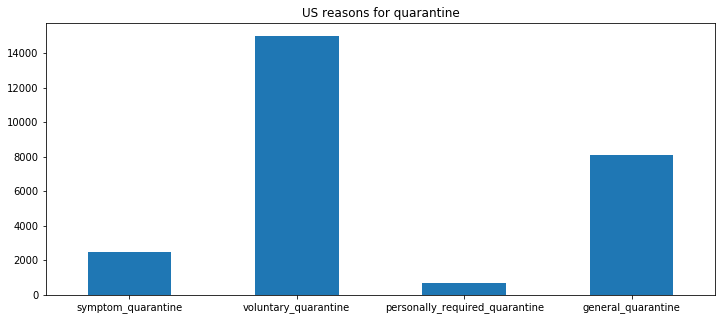

In [3]:
US_quarantinetype_df = cleaner_data_df[cleaner_data_df.country_code == 'US'][['country_code','symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine']]
grouped_US_quarantinetype_df = US_quarantinetype_df.groupby('country_code').sum().reset_index(drop=True)

plt.figure(figsize=(12,5))
grouped_US_quarantinetype_df.loc[0].plot.bar()
plt.title("US reasons for quarantine")
plt.xticks(rotation=0)
plt.show()

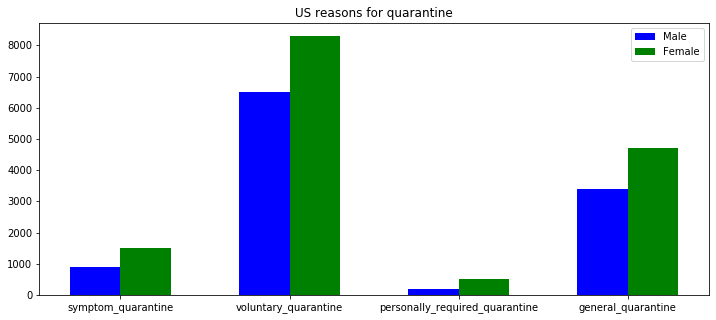

In [6]:
US_MEN_quarantinetype_df = cleaner_data_df[(cleaner_data_df.country_code == 'US') & (cleaner_data_df.gender == 'm')][['country_code','symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine']]
grouped_US_MEN_quarantinetype_df = US_MEN_quarantinetype_df.groupby('country_code').sum().reset_index(drop=True)
US_FEM_quarantinetype_df = cleaner_data_df[(cleaner_data_df.country_code == 'US') & (cleaner_data_df.gender == 'f')][['country_code','symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine']]
grouped_US_FEM_quarantinetype_df = US_FEM_quarantinetype_df.groupby('country_code').sum().reset_index(drop=True)

ind = np.arange(4)
width = 0.3
plt.figure(figsize=(12,5))
plt.bar(ind,grouped_US_MEN_quarantinetype_df.loc[0],width,color='blue',label="Male")
plt.bar(ind+width,grouped_US_FEM_quarantinetype_df.loc[0],width,color='green',label="Female")
plt.title("US reasons for quarantine")
plt.xticks(ind + width / 2, ('symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine'),rotation=0)
plt.legend()
plt.show()